In [1]:
import pandas as pd

# Load the dataset
file_path = 'merged_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,id,amount,status_cash_request,created_at_cash_request,updated_at_cash_request,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_fees,category,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,accepted,NaN,5.0,Postpone Cash Request 2568,2020-06-09 10:55:46.687183+00,2020-10-13 14:25:01.328917+00,NaN,2020-06-26 22:00:00+00,2020-07-26 22:00:00+00,before
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,cancelled,NaN,5.0,Postpone Cash Request 1796,2020-06-23 08:20:48.886973+00,2020-10-13 14:25:14.644112+00,NaN,2020-06-06 22:00:00+00,2020-07-05 21:44:16.477+00,after
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,cancelled,NaN,5.0,Postpone Cash Request 1518,2020-06-23 08:20:48.412006+00,2020-10-13 14:25:15.072076+00,NaN,2020-05-27 22:00:00+00,2020-06-27 03:49:38.153+00,after
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,accepted,NaN,5.0,Postpone Cash Request 2278,2020-05-30 03:49:55.393806+00,2020-10-13 14:25:00.784465+00,NaN,2020-06-12 22:00:00+00,2020-07-09 22:00:00+00,before
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-07-18 22:29:38.254506+00,2020-10-13 14:25:04.253057+00,2020-10-19 10:59:55.753868+00,NaN,NaN,after


In [2]:
# Summary statistics of the dataset
data_summary = data.describe(include='all')

# Checking the shape of the dataset
data_shape = data.shape

# Checking for missing values
print ('missing values')
missing_values = data.isnull().sum()

# Display the data summary, shape, and missing values information
data_summary, data_shape, missing_values


missing values


(                  id        amount status_cash_request  \
 count   26598.000000  23970.000000               23970   
 unique           NaN           NaN                   7   
 top              NaN           NaN          money_back   
 freq             NaN           NaN               16397   
 mean    13349.366456     82.720818                 NaN   
 std      7736.429593     26.528065                 NaN   
 min         1.000000      1.000000                 NaN   
 25%      6666.250000     50.000000                 NaN   
 50%     13317.500000    100.000000                 NaN   
 75%     19966.750000    100.000000                 NaN   
 max     27010.000000    200.000000                 NaN   
 
               created_at_cash_request       updated_at_cash_request  \
 count                           23970                         23970   
 unique                          23970                         23970   
 top     2019-12-10 19:05:21.596873+00  2019-12-11 16:47:42.40783+00   
 f

Summary of Initial Findings:

Dataset Structure:
- The dataset has 26,598 rows and 28 columns.
- Columns include details on transactions, user IDs, statuses, dates, amounts, and more.


Missing Values:
Several columns have missing values. 
Notably:
- deleted_account_id has the most missing values (24,494).
- moderated_at, cash_request_received_date, money_back_date, and others also have significant amounts of missing data.
//This indicates a need for data cleaning and handling of missing values during analysis.

Key Columns and Their Data Types:

- amount and total_amount are numerical columns indicating financial transactions.
- Date columns like created_at_cash_request, reimbursement_date, created_at_fees, etc., are the date metrics. 
- status_cash_request, status_fees, category, and charge_moment are categorical columns with multiple unique values.


Next Steps in EDA:

Data Cleaning:
- Handle missing values appropriately, either by imputation or by removing them depending on the context and necessity for analysis.

Visualizations and Distribution Analysis:
- Plot the distribution of numerical columns like amount.
- Analyze categorical distributions, such as status_cash_request and category.

Time-based Analysis:
- Extract relevant date information (e.g., month and year) from columns like created_at_cash_request for cohort creation.

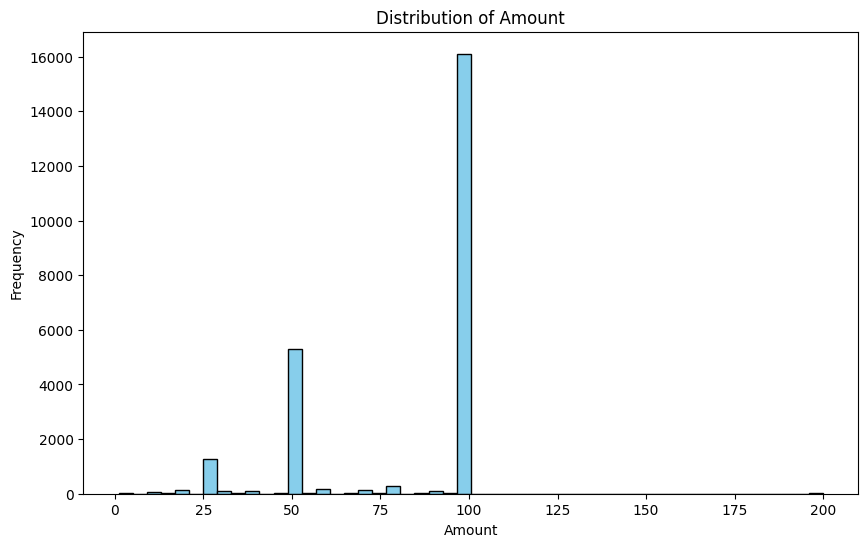

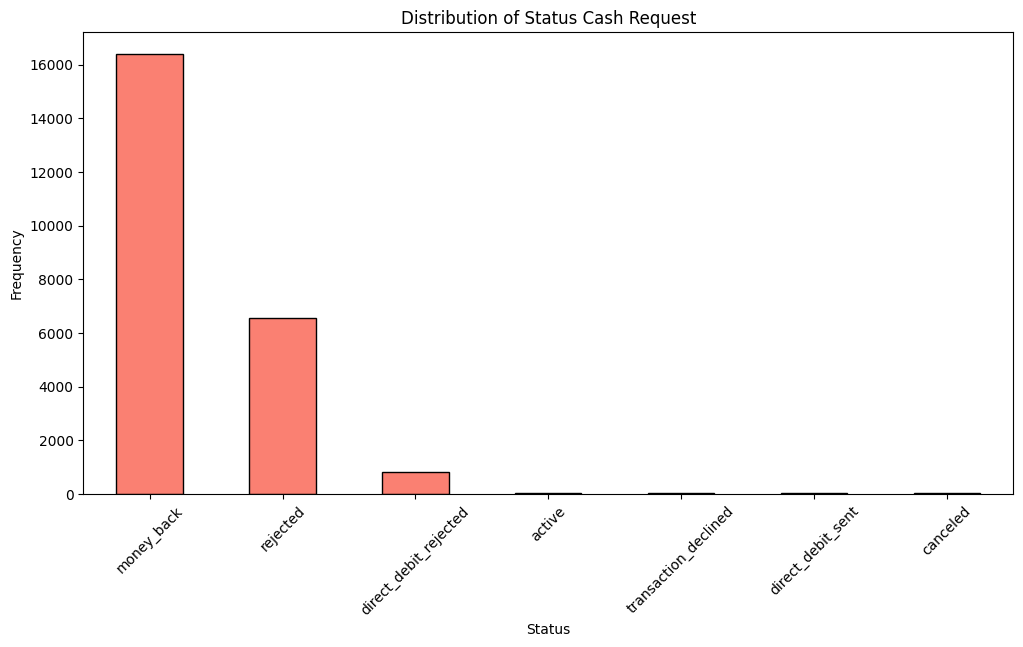

In [21]:
import matplotlib.pyplot as plt

# Handling missing values by filling with appropriate values or dropping
# For simplicity, let's drop rows where 'amount' is missing as it's crucial for analysis
data_cleaned = data.dropna(subset=['amount']).copy()

# Filling missing 'status_cash_request' with 'unknown'
# Using .loc to avoid SettingWithCopyWarning
data_cleaned.loc[:, 'status_cash_request'] = data_cleaned['status_cash_request'].fillna('unknown')

#Kerem added this 
#there is cohort_month in the file yet as it's not added 
data_cleaned.to_csv('data_cleaned.csv', index=False)



# Visualizing the distribution of 'amount'
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of 'status_cash_request'
status_counts = data_cleaned['status_cash_request'].value_counts()
plt.figure(figsize=(12, 6))
status_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Status Cash Request')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




Observations from Initial Visualizations:

Distribution of Amounts:

High Frequency at 100:
The histogram shows that the most frequent transaction amount is 100. This peak is significantly higher than other transaction amounts, indicating that a large portion of users requested this exact amount.


Distribution of Status Cash Request:

The status_cash_request column shows various statuses, with some categories more prevalent than others.


Date Analysis and Cohort Creation:
Extract the month and year from created_at_cash_request to define cohorts based on the month of user creation.
Cohort Analysis:
Calculate the following metrics for each cohort:
Frequency of Service Usage: Track how often users from each cohort use the service over time.
Incident Rate: Determine the incident rate for each cohort.
Revenue Generated: Calculate the total revenue generated by each cohort.
Propose and calculate a new relevant metric.

In [22]:
# ADDING DATE MONTH AND YEAR - CREATING COHORT

# Ensure you are working on a copy to avoid SettingWithCopyWarning
data_cleaned = data_cleaned.copy()

# Convert 'created_at_cash_request' to datetime, removing timezone info
# This converts the 'created_at_cash_request' column to a datetime object and removes any timezone information
# 'errors='coerce'' ensures that any invalid parsing will be set as NaT (Not a Time)
data_cleaned['created_at_cash_request'] = pd.to_datetime(data_cleaned['created_at_cash_request'], errors='coerce').dt.tz_localize(None)

# Extract cohort month and year by directly assigning to the column
# This extracts the month and year from 'created_at_cash_request' and stores it in a new column 'cohort_month'
data_cleaned['cohort_month'] = data_cleaned['created_at_cash_request'].dt.to_period('M')

# Display the first few rows to verify the new column
data_cleaned.head()

#adding cohort_mort to a new file 
output_file_path = 'data_cleaned_with_cohort_month.csv'
data_cleaned.to_csv(output_file_path, index=False)


#data_cleaned.head()
#cohort_month added to data_clean 


,id,amount,status_cash_request,created_at_cash_request,updated_at_cash_request,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,category,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment,cohort_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,5.0,Postpone Cash Request 2568,2020-06-09 10:55:46.687183+00,2020-10-13 14:25:01.328917+00,NaN,2020-06-26 22:00:00+00,2020-07-26 22:00:00+00,before,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,NaN,5.0,Postpone Cash Request 1796,2020-06-23 08:20:48.886973+00,2020-10-13 14:25:14.644112+00,NaN,2020-06-06 22:00:00+00,2020-07-05 21:44:16.477+00,after,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,5.0,Postpone Cash Request 1518,2020-06-23 08:20:48.412006+00,2020-10-13 14:25:15.072076+00,NaN,2020-05-27 22:00:00+00,2020-06-27 03:49:38.153+00,after,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,NaN,5.0,Postpone Cash Request 2278,2020-05-30 03:49:55.393806+00,2020-10-13 14:25:00.784465+00,NaN,2020-06-12 22:00:00+00,2020-07-09 22:00:00+00,before,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,rejected_direct_debit,5.0,rejected direct debit,2020-07-18 22:29:38.254506+00,2020-10-13 14:25:04.253057+00,2020-10-19 10:59:55.753868+00,NaN,NaN,after,2020-05


In [14]:

# 1. Frequency of Service Usage: Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.

# Grouping by cohort month and user ID to count the number of transactions per user
# This calculates how many times each user in each cohort used the service
# 'size()' counts the number of rows in each group, representing the number of transactions per user
# 'reset_index(name='usage_count')' converts the result to a DataFrame with a column named 'usage_count'
cohort_usage = data_cleaned.groupby(['cohort_month', 'user_id']).size().reset_index(name='usage_count')

# Aggregating to find the average usage per user for each cohort
# Here, we group by 'cohort_month' to calculate the average number of transactions per user in each cohort
# 'mean()' computes the average of 'usage_count' for each cohort
# 'reset_index()' converts the result to a DataFrame
cohort_frequency = cohort_usage.groupby('cohort_month')['usage_count'].mean().reset_index()

# Renaming columns for clarity
# Renaming the columns to make them more descriptive
# 'cohort_month' remains the same, 'usage_count' is renamed to 'average_usage_per_user'
cohort_frequency.columns = ['cohort_month', 'average_usage_per_user']

# Display the first few rows of the cohort frequency usage data
# This helps to verify that the data looks correct and provides insight into the average usage
cohort_frequency.head()
#print (cohort_frequency)



,cohort_month,average_usage_per_user
0,2019-11,1.000000
1,2019-12,1.121951
2,2020-01,1.106918
3,2020-02,1.068027
4,2020-03,1.131148


Frequency of Service Usage:
The table shows the average number of times users in each cohort used the service:

For example, users from the cohort of December 2019 used the service on average around 1.12 times.

In [6]:
# 2. Incident Rate: Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.

# Identifying incidents where 'status_cash_request' indicates an issue (e.g., 'rejected')
# Creating a new column 'incident' where:
# - The value is 1 if 'status_cash_request' is 'rejected', indicating a payment incident
# - The value is 0 otherwise
# This helps in quantifying incidents so we can calculate the incident rate
data_cleaned['incident'] = data_cleaned['status_cash_request'].apply(lambda x: 1 if x == 'rejected' else 0)


#there is actually a columd called TYPE = INCIDENT (YOU CAN CHANGE IT)
#there is actually a columd called TYPE = INCIDENT (YOU CAN CHANGE IT)
#there is actually a columd called TYPE = INCIDENT (YOU CAN CHANGE IT)
#there is actually a columd called TYPE = INCIDENT (YOU CAN CHANGE IT)
#there is actually a columd called TYPE = INCIDENT (YOU CAN CHANGE IT)
#there is actually a columd called TYPE = INCIDENT (YOU CAN CHANGE IT)
#there is actually a columd called TYPE = INCIDENT (YOU CAN CHANGE IT)
#there is actually a columd called TYPE = INCIDENT (YOU CAN CHANGE IT)
#there is actually a columd called TYPE = INCIDENT (YOU CAN CHANGE IT)



# Grouping by cohort and calculating the incident rate
# Grouping the data by 'cohort_month'
# Calculating the mean of the 'incident' column for each cohort month
# Since 'incident' is 1 for rejected and 0 otherwise, the mean gives us the incident rate (proportion of rejected requests) for each cohort
cohort_incident_rate = data_cleaned.groupby('cohort_month')['incident'].mean().reset_index()

# Renaming columns for clarity
# Changing the column names to be more descriptive
# 'cohort_month' indicates the month of the cohort
# 'incident_rate' represents the average incident rate for that cohort
cohort_incident_rate.columns = ['cohort_month', 'incident_rate']

# Display the incident rate for each cohort
# Show the first few rows to verify the calculated incident rates
cohort_incident_rate.head()


,cohort_month,incident_rate
0,2019-11,0.000000
1,2019-12,0.380623
2,2020-01,0.502242
3,2020-02,0.391304
4,2020-03,0.307377


Incident Rate:
The table indicates the rate of incidents (e.g., rejected requests) for each cohort:

For example, the cohort from December 2019 has an incident rate of approximately 38%.


In [7]:
# 3. Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

# Grouping by cohort and summing up the total amount to find the revenue generated by each cohort
# 'data_cleaned.groupby('cohort_month')['amount'].sum()':
# - Groups the data by 'cohort_month'
# - For each cohort, sums the 'amount' column to get the total revenue generated by that cohort
# '.reset_index()' converts the result to a DataFrame
cohort_revenue = data_cleaned.groupby('cohort_month')['amount'].sum().reset_index()

# Renaming columns for clarity
# Renaming the columns to make them more descriptive:
# - 'cohort_month': Indicates the month and year of the cohort
# - 'total_revenue': Represents the total revenue generated by users in that cohort
cohort_revenue.columns = ['cohort_month', 'total_revenue']

# Display the total revenue generated by each cohort
# Show the first few rows of the DataFrame to verify the calculated total revenue
cohort_revenue.head()


,cohort_month,total_revenue
0,2019-11,1.0
1,2019-12,27297.0
2,2020-01,21587.0
3,2020-02,16653.0
4,2020-03,23549.0


The table shows the total revenue generated by each cohort:

For example, the cohort from December 2019 generated a total revenue of 27,297 units.

In [8]:
#4. New Relevant Metric: Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

To provide additional insights, we can consider a new metric. One useful metric could be the Retention Rate:

Retention Rate: The percentage of users from each cohort who made at least one additional transaction after their initial cash request.


In [9]:
# Identify users who made more than one transaction
# Group by 'cohort_month' and calculate the retention rate
# Using a lambda function to determine the proportion of users who made more than one transaction
# - 'x > 1': Checks if the user made more than one transaction
# - '(x > 1).mean()': Calculates the mean of this condition, resulting in the proportion of users with more than one transaction
# '.reset_index()': Converts the result to a DataFrame
cohort_retention = cohort_usage.groupby('cohort_month')['usage_count'].apply(lambda x: (x > 1).mean()).reset_index()

# Renaming columns for clarity
# Renaming the columns to make them more descriptive:
# - 'cohort_month': Indicates the month and year of the cohort
# - 'retention_rate': Represents the proportion of users in that cohort who made more than one transaction
cohort_retention.columns = ['cohort_month', 'retention_rate']

# Display the retention rate for each cohort
# Show the first few rows of the DataFrame to verify the calculated retention rates
cohort_retention.head()


,cohort_month,retention_rate
0,2019-11,0.000000
1,2019-12,0.117073
2,2020-01,0.081761
3,2020-02,0.061224
4,2020-03,0.125683


Retention Rate:
The table shows the percentage of users from each cohort who made more than one transaction:

For instance, in the December 2019 cohort, approximately 11.7% of users made additional transactions after their initial request.
Summary of Findings:
Frequency of Service Usage: Users from each cohort generally used the service slightly more than once on average.
Incident Rate: There is variability in incident rates across cohorts, with some cohorts experiencing a higher proportion of rejected requests.
Revenue Generation: Each cohort contributes a varying amount of total revenue, with some cohorts generating significantly more.
Retention Rate: A notable percentage of users in some cohorts make repeat transactions, indicating user retention.
